In [4]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pylab import rcParams
from scipy import stats

In [5]:
%matplotlib inline

## Обработка данных, выборосов и пропусков

Data of over 46000 movies from 1874 to 2016 with their title, year of release, rating, runtime, genre, director, writer, cast, critics, imdb Rating, imdb Votes, poster, plot, language of the movie, country , awards won by the movie

In [6]:
df = pd.DataFrame(pd.read_csv('C:/Users/olga/Documents/Матстатистика/course_work/movies_initial.csv', engine = 'python', delimiter =','))
df

,imdbID,title,year,rating,runtime,genre,released,director,writer,cast,...,imdbRating,imdbVotes,poster,plot,fullplot,language,country,awards,lastupdated,type
0,1,Carmencita,1894,NOT RATED,1 min,"Documentary, Short",NaN,William K.L. Dickson,NaN,Carmencita,...,5.9,1032.0,https://m.media-amazon.com/images/M/MV5BMjAzND...,Performing on what looks like a small wooden s...,Performing on what looks like a small wooden s...,NaN,USA,NaN,2015-08-26 00:03:45.040000000,movie
1,5,Blacksmith Scene,1893,UNRATED,1 min,Short,1893-05-09,William K.L. Dickson,NaN,"Charles Kayser, John Ott",...,6.2,1189.0,NaN,Three men hammer on an anvil and pass a bottle...,A stationary camera looks at a large anvil wit...,NaN,USA,1 win.,2015-08-26 00:03:50.133000000,movie
2,3,Pauvre Pierrot,1892,NaN,4 min,"Animation, Comedy, Short",1892-10-28,пїЅmile Reynaud,NaN,NaN,...,6.7,566.0,NaN,"One night, Arlequin come to see his lover Colo...","One night, Arlequin come to see his lover Colo...",NaN,France,NaN,2015-08-12 00:06:02.720000000,movie
3,8,Edison Kinetoscopic Record of a Sneeze,1894,NaN,1 min,"Documentary, Short",1894-01-09,William K.L. Dickson,NaN,Fred Ott,...,5.9,988.0,NaN,A man (Thomas Edison's assistant) takes a pinc...,A man (Edison's assistant) takes a pinch of sn...,NaN,USA,NaN,2015-08-10 00:21:07.127000000,movie
4,10,Employees Leaving the LumiпїЅre Factory,1895,NaN,1 min,"Documentary, Short",1895-03-22,Louis LumiпїЅre,NaN,NaN,...,6.9,3469.0,NaN,A man opens the big gates to the LumiпїЅre fac...,A man opens the big gates to the LumiпїЅre fac...,NaN,France,NaN,2015-08-26 00:03:56.603000000,movie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46009,5005684,The New Classmate,2015,NaN,NaN,"Drama, Family",2015-10-11,Ashwiny Iyer Tiwari,NaN,"Swara Bhaskar, Ratna Pathak, Pankaj Tripathy",...,NaN,NaN,NaN,NaN,NaN,Hindi,India,NaN,2015-09-10 22:28:58.883000000,movie
46010,5013056,Untitled Christopher Nolan Project,2017,NaN,NaN,Sci-Fi,2017-07-21,Christopher Nolan,"Christopher Nolan (screenplay), Christopher Nolan",NaN,...,NaN,NaN,NaN,Plot is being kept under wraps.,Plot is being kept under wraps.,English,"USA, UK",NaN,2015-09-11 17:15:04.527000000,movie
46011,5013980,Die Turnschuh-Giganten,2016,NaN,NaN,"Biography, Drama, War",NaN,Oliver Dommenget,Christian Schnalke,"Ken Duken, Florian BartholomпїЅi, Torben Liebr...",...,NaN,NaN,NaN,NaN,NaN,German,Germany,NaN,2015-09-12 23:13:48.997000000,movie
46012,5016760,The Monster of Mangatiti,2015,NaN,NaN,NaN,2015-09-06,NaN,John Banas,"Greta Gregory, Mark Mitchinson, Flynn Allan, H...",...,NaN,NaN,NaN,Heather Walsh tells her story of the time she ...,Heather Walsh tells her story of the time she ...,English,New Zealand,NaN,2015-09-12 03:47:27.780000000,movie


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46014 entries, 0 to 46013
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   imdbID       46014 non-null  int64  
 1   title        46014 non-null  object 
 2   year         46014 non-null  object 
 3   rating       24629 non-null  object 
 4   runtime      43377 non-null  object 
 5   genre        45615 non-null  object 
 6   released     43002 non-null  object 
 7   director     45409 non-null  object 
 8   writer       42942 non-null  object 
 9   cast         44928 non-null  object 
 10  metacritic   9401 non-null   float64
 11  imdbRating   44300 non-null  float64
 12  imdbVotes    44299 non-null  float64
 13  poster       35798 non-null  object 
 14  plot         42161 non-null  object 
 15  fullplot     41421 non-null  object 
 16  language     44899 non-null  object 
 17  country      45830 non-null  object 
 18  awards       23542 non-null  object 
 19  last

In [8]:
df.isnull().sum()

imdbID             0
title              0
year               0
rating         21385
runtime         2637
genre            399
released        3012
director         605
writer          3072
cast            1086
metacritic     36613
imdbRating      1714
imdbVotes       1715
poster         10216
plot            3853
fullplot        4593
language        1115
country          184
awards         22472
lastupdated        0
type              38
dtype: int64

In [9]:
df.shape

(46014, 21)

Так как наименьшее количество пропущенных данных в датасете по столбцу imdbRatingю Будем ориентироваться на эту величину, как показатель, характеризующий уровень популярности фильма. Столбец 'rating' почти на 50% не заполнен. Пjэтому нельзя его использовать, как определяющий признак полпулярности фильмов.

In [10]:
df.describe(include='object')

,title,year,rating,runtime,genre,released,director,writer,cast,poster,plot,fullplot,language,country,awards,lastupdated,type
count,46014,46014,24629,43377,45615,43002,45409,42942,44928,35798,42161,41421,44899,45830,23542,46014,45976
unique,41512,170,31,359,1450,15724,18881,36500,42938,34324,40683,39987,2610,2938,2901,45562,2
top,Hamlet,2015,R,90 min,Drama,2015-09-01,John Ford,Woody Allen,Georges MпїЅliпїЅs,https://m.media-amazon.com/images/M/MV5BOTU5MT...,The plot is unknown at this time.,The plot is unknown.,English,USA,1 nomination.,2015-08-16 00:24:45.463000000,movie
freq,11,2088,9559,2514,5455,37,59,41,29,6,11,9,25325,20589,3158,5,45585


In [11]:
df.describe()

,imdbID,metacritic,imdbRating,imdbVotes
count,4.601400e+04,9401.000000,44300.000000,4.429900e+04
mean,8.552062e+05,56.896288,6.381454,1.180055e+04
std,1.141979e+06,17.715373,1.183113,4.934499e+04
min,1.000000e+00,1.000000,1.100000,5.000000e+00
25%,8.165750e+04,45.000000,5.800000,3.260000e+02
50%,2.524875e+05,58.000000,6.600000,9.990000e+02
75%,1.370868e+06,70.000000,7.200000,3.829000e+03
max,5.023260e+06,100.000000,9.600000,1.521105e+06


In [12]:
df = df.drop(df[df['imdbRating'].isnull()].index)

In [13]:
df[df['genre'].isnull()&df['rating'].isnull()]

,imdbID,title,year,rating,runtime,genre,released,director,writer,cast,...,imdbRating,imdbVotes,poster,plot,fullplot,language,country,awards,lastupdated,type
322,14524,New Year's Eve,1924,NaN,66 min,NaN,1924-01-03,Lupu Pick,Carl Mayer,"Eugen KlпїЅpfer, Edith Posca, Frida Richard, K...",...,6.7,58.0,NaN,NaN,NaN,German,Germany,NaN,2014-12-31 00:03:53.440000000,movie
488,18440,Spring Fever,1927,NaN,78 min,NaN,1927-10-22,Edward Sedgwick,"Frank Davis, Vincent Lawrence (play), Albert L...","William Haines, Joan Crawford, George K. Arthu...",...,7.9,687.0,https://m.media-amazon.com/images/M/MV5BODEyMD...,"To impress a wealthy young woman, a clerk pret...","To impress a wealthy young woman, a clerk pret...",English,USA,NaN,2015-09-14 23:47:34.783000000,movie
688,21283,"I Flunked, But...",1930,NaN,65 min,NaN,1930-04-11,YasujirпїЅ Ozu,"Akira Fushimi, YasujirпїЅ Ozu (story)","Tatsuo SaitпїЅ, Kaoru Futaba, Kinuyo Tanaka, T...",...,6.6,185.0,NaN,NaN,NaN,Japanese,Japan,NaN,2015-09-02 00:30:18.553000000,movie
916,23450,Where Now Are the Dreams of Youth,1932,NaN,92 min,NaN,1932-10-13,YasujirпїЅ Ozu,KпїЅgo Noda,"Ureo Egawa, Kinuyo Tanaka, Tatsuo SaitпїЅ, Har...",...,7.3,255.0,NaN,When a young man inherits his father's lucrati...,When a young man inherits his father's lucrati...,NaN,Japan,NaN,2015-04-15 01:02:53.583000000,movie
1128,25054,The Doctor's Secret,1934,NaN,1 h 8 min,NaN,1934-11-01,Norman Lee,"Syd Courtenay, Clifford Grey","Leslie Fuller, John Mills, Marguerite Allan, M...",...,4.4,8.0,NaN,NaN,NaN,NaN,NaN,NaN,2013-10-29 00:00:00,movie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45498,4536494,The Blue Hour,2015,NaN,97 min,NaN,2015-05-30,Anucha Boonyawatana,"Anucha Boonyawatana (screenplay), Waasuthep Ke...","Atthaphan Poonsawas, Oabnithi Wiwattanawarang,...",...,7.3,41.0,NaN,NaN,NaN,Thai,Thailand,1 win.,2015-09-07 00:09:52.210000000,movie
45506,4543804,Viaje,2015,NaN,71 min,NaN,2015-04-16,Paz FпїЅbrega,NaN,"Fernando BolaпїЅos, Kattia GonzпїЅlez",...,6.9,28.0,NaN,NaN,NaN,Spanish,Costa Rica,2 nominations.,2015-08-22 01:09:37.843000000,movie
45568,4604496,Men Go to Battle,2015,NaN,98 min,NaN,2015-04-17,Zachary Treitz,"Kate Lyn Sheil, Zachary Treitz","Charlotte Arnold, Steve Coulter, Rachel Korine...",...,7.4,16.0,NaN,"Kentucky, 1861. Francis and Henry Mellon depen...","Kentucky, 1861. Francis and Henry Mellon depen...",English,USA,1 win & 1 nomination.,2015-08-10 00:06:37.377000000,movie
45647,4662412,"Signed, Sealed, Delivered: From Paris with Love",2015,NaN,NaN,NaN,2015-06-06,Kevin Fair,"Martha Williamson (created by), Martha William...","Eric Mabius, Kristin Booth, Crystal Lowe, Geof...",...,7.3,119.0,NaN,"The Postables---Oliver, Shane, Rita, and Norma...","The Postables---Oliver, Shane, Rita, and Norma...",English,USA,NaN,2015-09-10 17:21:20.323000000,movie


Убираем фильмы, которые имеют пропуски в признаке 'genre'

In [14]:
df = df.drop(df[df['genre'].isnull()].index)
df.isnull().sum()

imdbID             0
title              0
year               0
rating         19450
runtime         1361
genre              0
released        1964
director         518
writer          2794
cast             841
metacritic     34587
imdbRating         0
imdbVotes          1
poster          8628
plot            3112
fullplot        3785
language         797
country           67
awards         20617
lastupdated        0
type               0
dtype: int64

Обрабатываем признак года, удаляя все нецифровые символы в ячейках по этому признаку.

In [16]:
df['year'].unique()

array(['1894', '1893', '1892', '1895', '1896', '1897', '1898', '1899',
       '1900', '1901', '1902', '1903', '1905', '1904', '1912', '1908',
       '1906', '1907', '1909', '1910', '1911', '1913', '1914', '1915',
       '1916', '1918', '1917', '1919', '1920', '1921', '1922', '1923',
       '1924', '1929', '1925', '1926', '1935', '1927', '1928', '1930',
       '1931', '1932', '1933', '1934', '1936', '1938', '1937', '1940',
       '1939', '1943', '1948', '1941', '1942', '1959', '1944', '2001',
       '1945', '1946', '1947', '1949', '1952', '1950', '1951', '1953',
       '1954', '1955', '1956', '1957', '1965', '1958', '1984', '1962',
       '1960', '1961', '1963', '1971', '1964', '1966', '1967', '1969',
       '1970', '1968', '1972', '1981', '1989', '1990', '1976', '1974',
       '1973', '1975', '1977', '1978', '1979', '1980', '1979пїЅ', '1982',
       '1980пїЅ', '1983', '1987', '1993', '1981пїЅ', '1985', '1986',
       '1988', '1986пїЅ', '1987пїЅ', '1988пїЅ', '1991', '2002', '1992',
    

In [17]:
df['year1'] = df['year'].str.extract('(\d+)').astype(int)
df['year1'].unique()

array([1894, 1893, 1892, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902,
       1903, 1905, 1904, 1912, 1908, 1906, 1907, 1909, 1910, 1911, 1913,
       1914, 1915, 1916, 1918, 1917, 1919, 1920, 1921, 1922, 1923, 1924,
       1929, 1925, 1926, 1935, 1927, 1928, 1930, 1931, 1932, 1933, 1934,
       1936, 1938, 1937, 1940, 1939, 1943, 1948, 1941, 1942, 1959, 1944,
       2001, 1945, 1946, 1947, 1949, 1952, 1950, 1951, 1953, 1954, 1955,
       1956, 1957, 1965, 1958, 1984, 1962, 1960, 1961, 1963, 1971, 1964,
       1966, 1967, 1969, 1970, 1968, 1972, 1981, 1989, 1990, 1976, 1974,
       1973, 1975, 1977, 1978, 1979, 1980, 1982, 1983, 1987, 1993, 1985,
       1986, 1988, 1991, 2002, 1992, 1995, 1994, 1996, 1997, 1999, 1998,
       2005, 2000, 2003, 2004, 2006, 2010, 2008, 2007, 1891, 2012, 2011,
       2009, 1888, 2013, 1890, 2014, 2015, 1887, 1880, 1874])

In [18]:
df['year1'].value_counts().sort_values().head(20)

1880     1
1874     1
1887     1
1893     1
1888     2
1902     2
1892     3
1905     4
1890     4
1891     5
1899     5
1908     6
1910     7
1907     8
1897     8
1906     8
1911     9
1895    10
1904    10
1901    11
Name: year1, dtype: int64

## exploratory data analysis

Text(0.5, 1.0, 'Количество фильмов по годам')

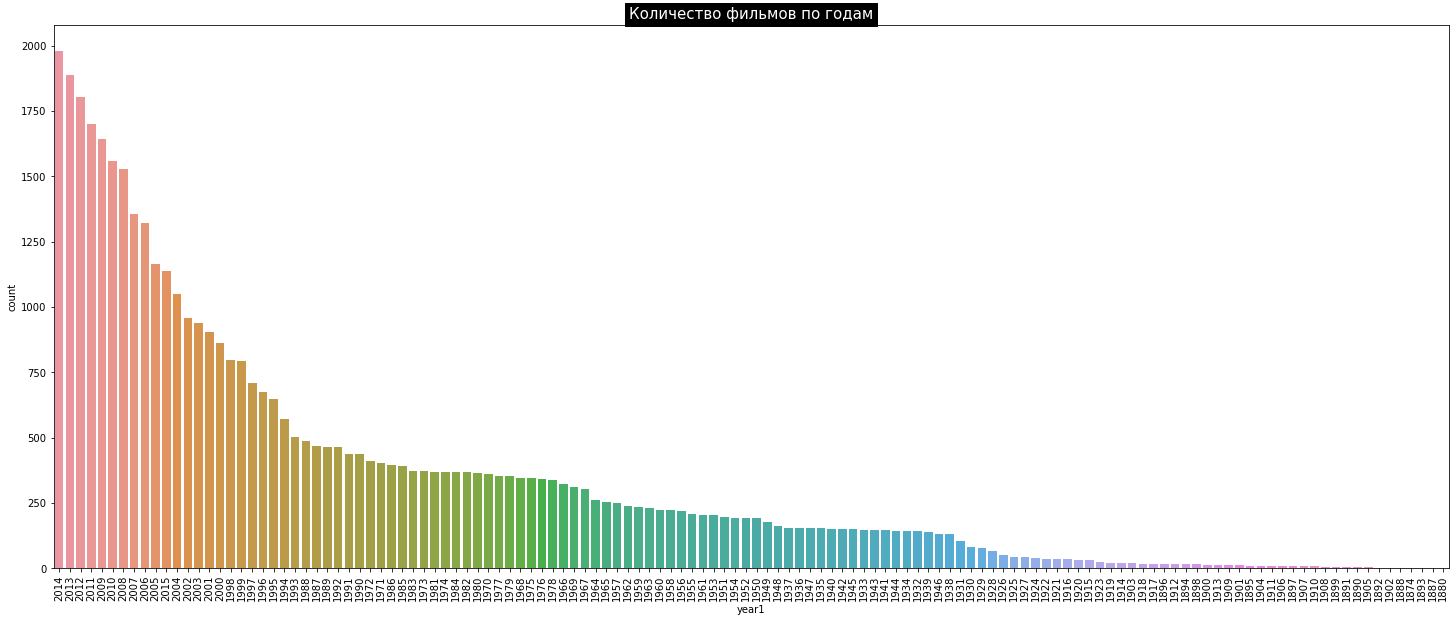

In [21]:
plt.figure(figsize= (25,10))
plt.xticks(rotation=90)
rating = sns.countplot(x='year1', data=df,order = df['year1'].value_counts().index)
rating.set_title('Количество фильмов по годам',
                  fontsize = 15,
                  color = 'white',
                  backgroundcolor = 'black')

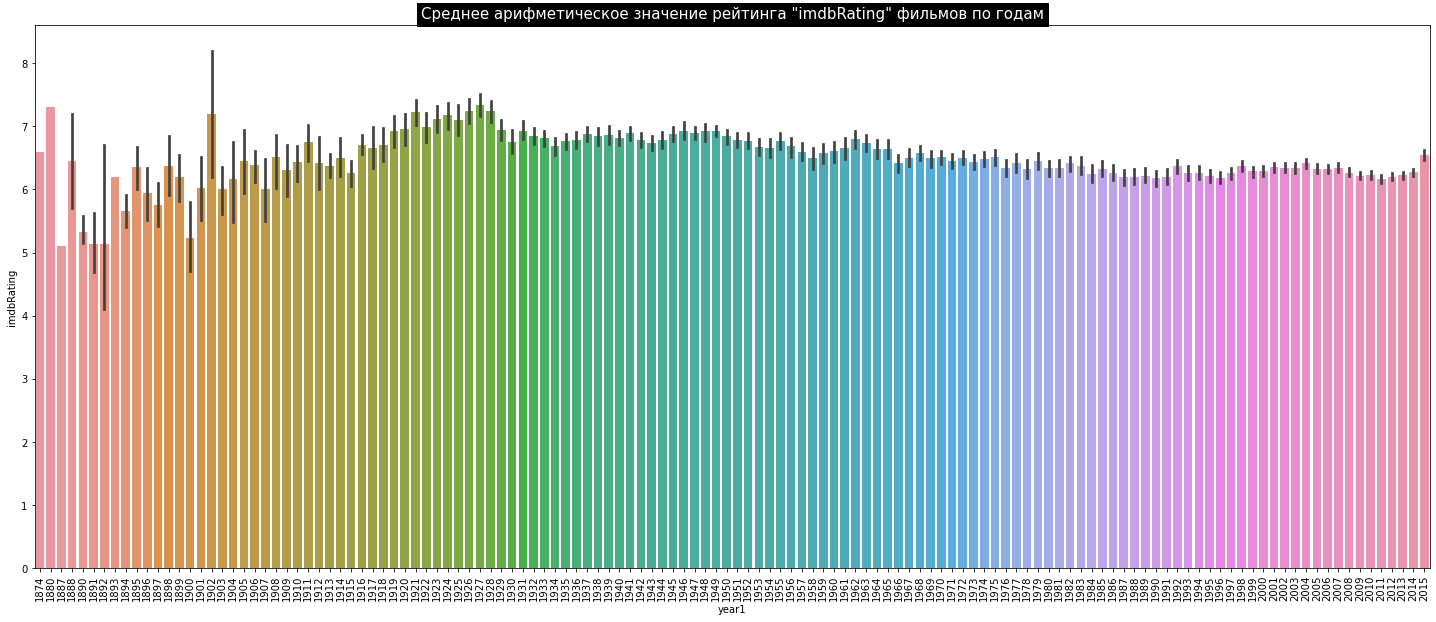

In [26]:
plt.figure(figsize= (25,10))
plt.xticks(rotation=90)
rating1=sns.barplot(x='year1', y='imdbRating', data=df)
rating1.set_title('Среднее арифметическое значение рейтинга "imdbRating" фильмов по годам',
                  fontsize = 15,
                  color = 'white',
                  backgroundcolor = 'black');

''

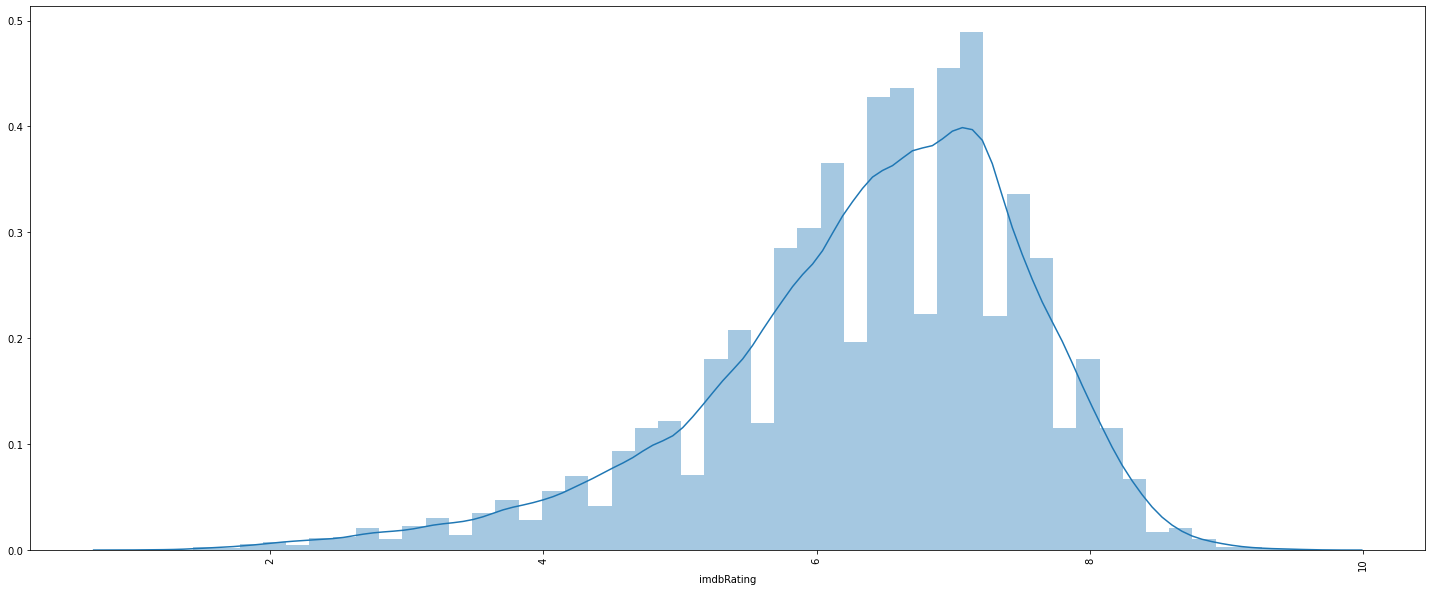

In [34]:
plt.figure(figsize= (25,10))
plt.xticks(rotation=90)
sns.distplot(df['imdbRating'])
;

Расcмотрим какие уникальные значение признака 'genre' в датасете и сколько их.

In [35]:
df['genre'].value_counts()

Drama                             5171
Comedy                            3093
Documentary                       1936
Comedy, Drama                     1614
Drama, Romance                    1372
                                  ... 
Action, Crime, Music                 1
Adventure, Action, Comedy            1
Musical, Drama, Fantasy              1
Fantasy, Mystery                     1
Documentary, Biography, Sci-Fi       1
Name: genre, Length: 1435, dtype: int64

Выберем первый жанр в списке "смешанных", как определяющий жанр фильма и добавим его в столбец 'genre0'

In [42]:
new_df = df['genre'].str.split(', ',expand=True)
new_df.columns=['genre0', 'genre1','genre2','genre3', 'genre4']
new_df
final_df=pd.concat([df, new_df], axis =1)

In [43]:
final_df = final_df.drop('genre', axis=1)
final_df

,imdbID,title,year,rating,runtime,released,director,writer,cast,metacritic,...,country,awards,lastupdated,type,year1,genre0,genre1,genre2,genre3,genre4
0,1,Carmencita,1894,NOT RATED,1 min,NaN,William K.L. Dickson,NaN,Carmencita,NaN,...,USA,NaN,2015-08-26 00:03:45.040000000,movie,1894,Documentary,Short,None,None,None
1,5,Blacksmith Scene,1893,UNRATED,1 min,1893-05-09,William K.L. Dickson,NaN,"Charles Kayser, John Ott",NaN,...,USA,1 win.,2015-08-26 00:03:50.133000000,movie,1893,Short,None,None,None,None
2,3,Pauvre Pierrot,1892,NaN,4 min,1892-10-28,пїЅmile Reynaud,NaN,NaN,NaN,...,France,NaN,2015-08-12 00:06:02.720000000,movie,1892,Animation,Comedy,Short,None,None
3,8,Edison Kinetoscopic Record of a Sneeze,1894,NaN,1 min,1894-01-09,William K.L. Dickson,NaN,Fred Ott,NaN,...,USA,NaN,2015-08-10 00:21:07.127000000,movie,1894,Documentary,Short,None,None,None
4,10,Employees Leaving the LumiпїЅre Factory,1895,NaN,1 min,1895-03-22,Louis LumiпїЅre,NaN,NaN,NaN,...,France,NaN,2015-08-26 00:03:56.603000000,movie,1895,Documentary,Short,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45949,4936064,In Jackson Heights,2015,NaN,190 min,2015-10-04,Frederick Wiseman,NaN,NaN,NaN,...,USA,NaN,2015-09-14 02:05:30.743000000,movie,2015,Documentary,None,None,None,None
45974,4957236,Cosmos Laundromat,2015,NaN,12 min,2015-08-10,Mathieu Auvray,Esther Wouda,"Pierre Bokma, Reinout Scholten van Aschat",NaN,...,Netherlands,NaN,2015-09-03 02:18:10.507000000,movie,2015,Animation,Short,None,None,None
45982,4967094,Our Times,2015,NaN,NaN,2015-08-13,Frankie Chen,NaN,"Joe Chen, Dewi Chien, Vivian Sung, Darren Wang",NaN,...,Taiwan,NaN,2015-08-27 22:32:56.313000000,movie,2015,Romance,None,None,None,None
45998,4987556,Thani Oruvan,2015,NaN,160 min,2015-08-28,M. Raja,"A.N. Balakrishnan, M. Raja, M. Raja, D. Suresh...","Abhinaya, Junior Balaiya, Mugdha Godse, V. Jay...",NaN,...,India,NaN,2015-09-02 23:40:25.913000000,movie,2015,Action,Thriller,None,None,None


In [ ]:
В результате получаем 25 видов жанров для фильмов в этом датасете

In [44]:
final_df['genre0'].unique()

array(['Documentary', 'Short', 'Animation', 'Comedy', 'Drama', 'Fantasy',
       'Biography', 'Adventure', 'Crime', 'Action', 'Western', 'Romance',
       'Mystery', 'Thriller', 'Horror', 'History', 'War', 'Musical',
       'Film-Noir', 'Family', 'Music', 'Sci-Fi', 'Adult', 'Sport', 'News'],
      dtype=object)

Text(0.5, 1.0, 'Количество фильмов жанра за весь период с 1874 по 2015 годы')

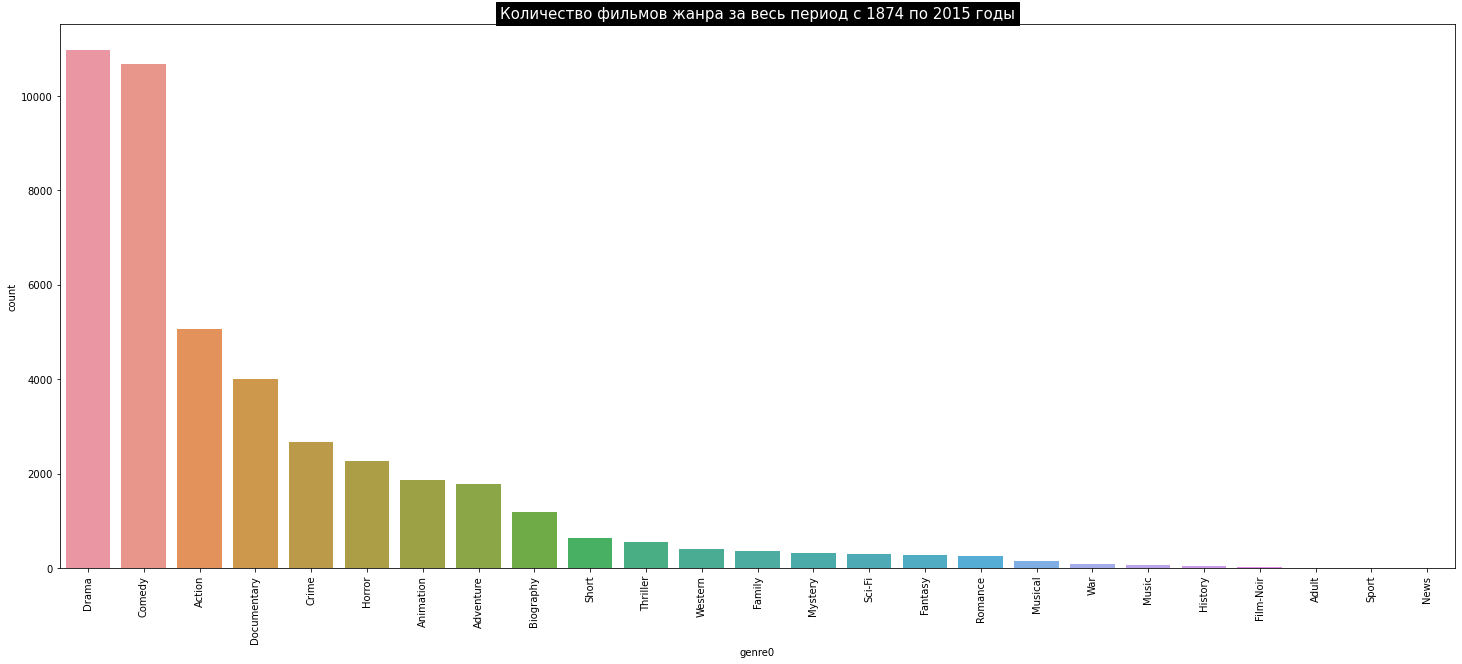

In [46]:
plt.figure(figsize= (25,10))
plt.xticks(rotation=90)
genre = sns.countplot(x='genre0', data=final_df,order = final_df['genre0'].value_counts().index)
genre.set_title('Количество фильмов жанра за весь период с 1874 по 2015 годы',
                  fontsize = 15,
                  color = 'white',
                  backgroundcolor = 'black')


In [ ]:
Самое большое количество фильмов за весь период наблюдений снято в жанрах Drama, Comedy и Action

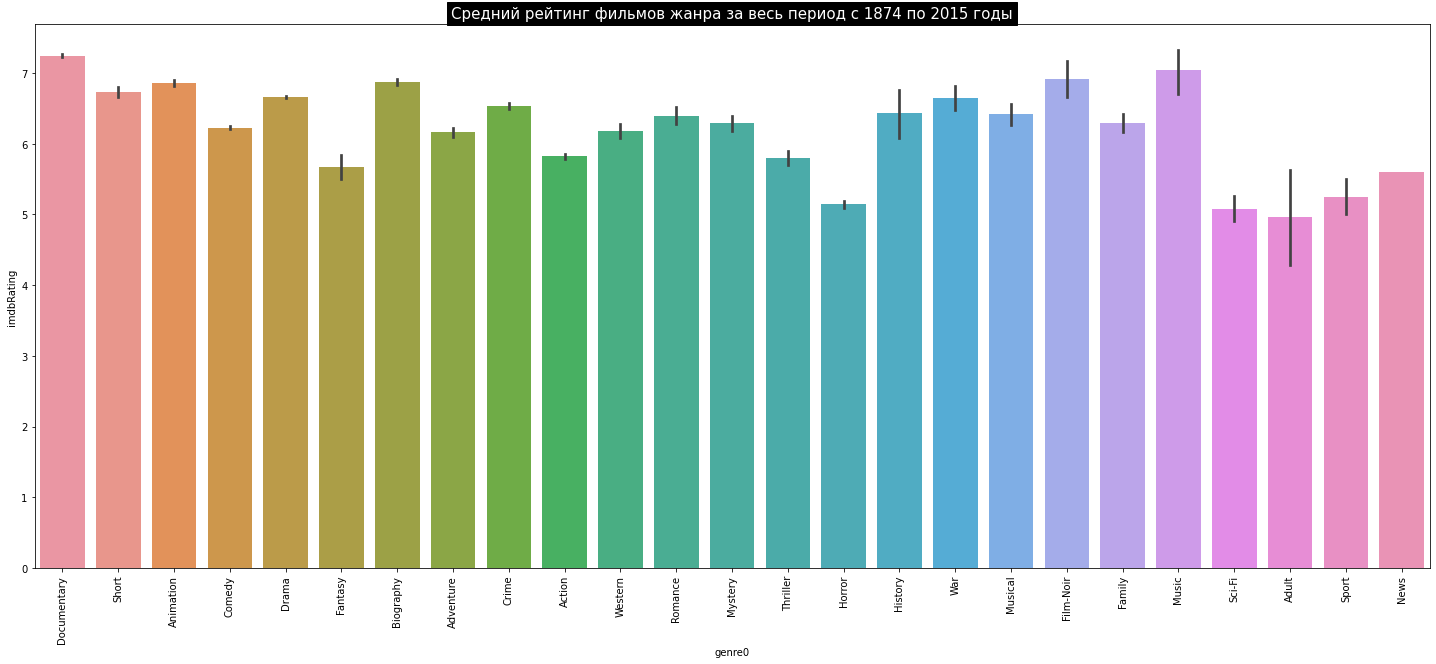

In [58]:
plt.figure(figsize= (25,10))
plt.xticks(rotation=90)
genre1 = sns.barplot(x='genre0', y='imdbRating', data=final_df)
genre1.set_title('Средний рейтинг фильмов жанра за весь период с 1874 по 2015 годы',
                  fontsize = 15,
                  color = 'white',
                  backgroundcolor = 'black');

Самый высокий средний рейтинг за весь период наблюдений имеют жанры: Documentary, Music, Animation, Film-Noir, Biography

plt.figure(figsize= (25,10))
plt.xticks(rotation=90)
plt.xticks(np.arange(len(final_df)), final_df['genre0'])
sns.distplot(final_df['imdbRating']);

In [26]:
##final_df.loc[(final_df['year1'] > 1920) & (final_df['year1'] < 1930), 'imdbRating'].median()

In [ ]:
Посмотрим, как средние рейтинги по жанрам распределяются в каждом из десятилетий 20 -21 веков.

In [49]:
r1 =pd.DataFrame(final_df.loc[(final_df['year1'] >= 1900) & (final_df['year1'] < 1910), 'imdbRating'].groupby([final_df['genre0']]).median())
r2 =pd.DataFrame(final_df.loc[(final_df['year1'] >= 1910) & (final_df['year1'] < 1920), 'imdbRating'].groupby([final_df['genre0']]).median())
r3 =pd.DataFrame(final_df.loc[(final_df['year1'] >= 1920) & (final_df['year1'] < 1930), 'imdbRating'].groupby([final_df['genre0']]).median())
r4 =pd.DataFrame(final_df.loc[(final_df['year1'] >= 1930) & (final_df['year1'] < 1940), 'imdbRating'].groupby([final_df['genre0']]).median())
r5 =pd.DataFrame(final_df.loc[(final_df['year1'] >= 1940) & (final_df['year1'] < 1950), 'imdbRating'].groupby([final_df['genre0']]).median())
r6 =pd.DataFrame(final_df.loc[(final_df['year1'] >= 1950) & (final_df['year1'] < 1960), 'imdbRating'].groupby([final_df['genre0']]).median())
r7 =pd.DataFrame(final_df.loc[(final_df['year1'] >= 1960) & (final_df['year1'] < 1970), 'imdbRating'].groupby([final_df['genre0']]).median())
r8 =pd.DataFrame(final_df.loc[(final_df['year1'] >= 1970) & (final_df['year1'] < 1980), 'imdbRating'].groupby([final_df['genre0']]).median())
r9 =pd.DataFrame(final_df.loc[(final_df['year1'] >= 1980) & (final_df['year1'] < 1990), 'imdbRating'].groupby([final_df['genre0']]).median())
r10=pd.DataFrame(final_df.loc[(final_df['year1'] >= 1990) & (final_df['year1'] < 2000), 'imdbRating'].groupby([final_df['genre0']]).median())
r11=pd.DataFrame(final_df.loc[(final_df['year1'] >= 2000) & (final_df['year1'] < 2010), 'imdbRating'].groupby([final_df['genre0']]).median())
r12=pd.DataFrame(final_df.loc[(final_df['year1'] >= 2010) & (final_df['year1'] < 2020), 'imdbRating'].groupby([final_df['genre0']]).median())

In [53]:
rb = pd.concat([r1, r2, r3, r4, r5, r6, r7, r8, r9, r10, r11, r12], axis =1)
rb.reset_index(inplace = True)
rb.columns = ['genre0','1','2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
rb

,genre0,1,2,3,4,5,6,7,8,9,10,11,12
0,Animation,6.7,7.30,6.70,7.30,7.00,7.40,7.20,7.40,7.30,7.10,6.80,6.90
1,Biography,6.3,6.65,7.25,6.90,7.10,7.00,7.10,7.10,7.10,7.10,6.90,6.70
2,Comedy,6.8,6.95,7.20,7.00,6.90,6.90,6.60,6.60,6.10,6.30,6.20,6.20
3,Documentary,5.3,NaN,7.40,7.25,7.30,7.30,7.50,7.50,7.60,7.40,7.40,7.30
4,Fantasy,6.3,6.35,7.45,6.60,6.85,5.90,6.60,5.80,6.40,5.70,5.90,5.55
5,Short,6.3,6.50,7.10,6.60,6.40,6.90,6.60,6.85,6.90,7.10,7.10,7.30
6,Action,NaN,6.95,7.30,6.10,6.80,6.55,6.55,6.30,5.90,5.80,5.90,5.90
7,Adventure,NaN,6.60,7.15,6.70,6.80,6.60,6.25,6.40,6.20,6.00,6.10,6.20
8,Crime,NaN,6.75,7.10,6.90,6.90,6.80,7.00,6.50,6.80,6.50,6.50,6.30
9,Drama,NaN,6.50,7.10,6.90,7.00,7.10,7.20,7.00,6.90,6.80,6.70,6.50


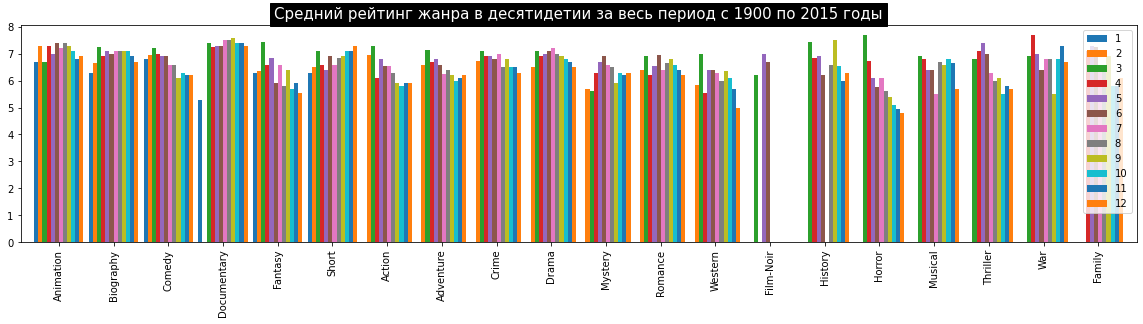

In [59]:
rcParams["figure.figsize"] = 20, 4
locs = ['lower center']
#plt.hist(r2,  label='b')

rrr=rb[0:20].plot(kind = 'bar', width = 0.9)
plt.xticks(np.arange(len(rb[0:20])), rb['genre0'])
rrr.set_title('Средний рейтинг жанра в десятидетии за весь период с 1900 по 2015 годы',
                  fontsize = 15,
                  color = 'white',
                  backgroundcolor = 'black');
##xlabel = rb['genre0']
##rb.set_xlim([0, 15])
##legend = rb[0:0]
##legend.remove
plt.show()

На графике видно, что самым стабильно высоким рейтингом всегда отличался жанр Documentary, Animamation,Biography
Посмотрим как в каждом из десятилетий 20 - 21 века менялась популярность жанров

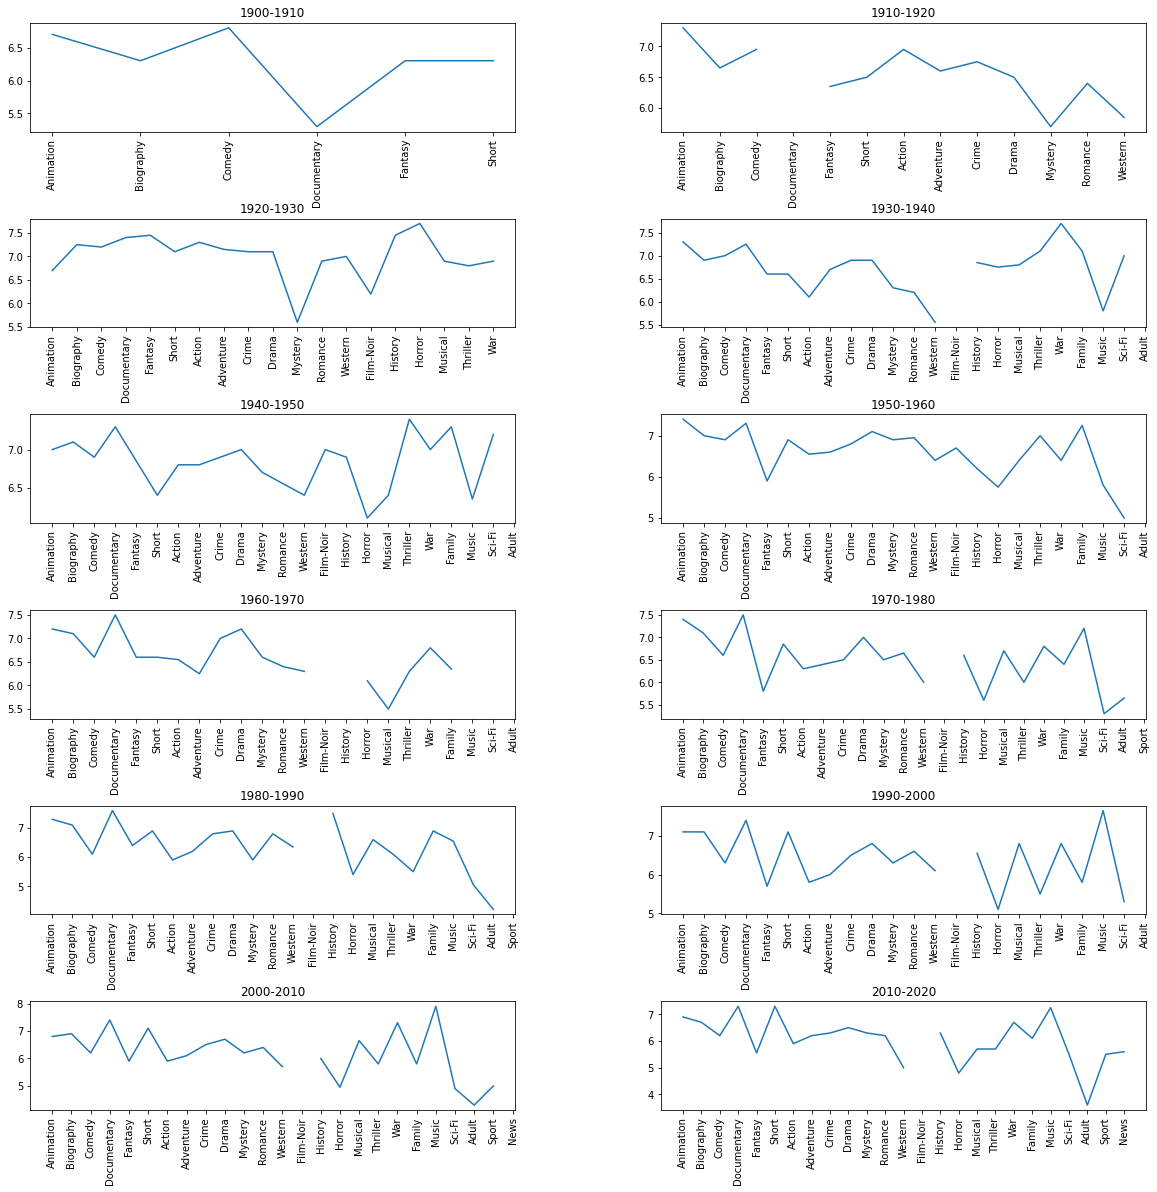

In [274]:
fig, ax = plt.subplots(nrows=6, ncols=2)
ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12 = ax.flatten()
ax1.plot(np.array(rb['genre0']), np.array(rb['1']))
ax1.set_title('1900-1910')
plt.xticks(rotation=90)
ax2.plot(np.array(rb['genre0']), np.array(rb['2']))
ax2.set_title('1910-1920')
ax3.plot(np.array(rb['genre0']), np.array(rb['3']))
ax3.set_title('1920-1930')
ax4.plot(np.array(rb['genre0']), np.array(rb['4']))
ax4.set_title('1930-1940')
ax5.plot(np.array(rb['genre0']), np.array(rb['5']))
ax5.set_title('1940-1950')
ax6.plot(np.array(rb['genre0']), np.array(rb['6']))
ax6.set_title('1950-1960')
ax7.plot(np.array(rb['genre0']), np.array(rb['7']))
ax7.set_title('1960-1970')
ax8.plot(np.array(rb['genre0']), np.array(rb['8']))
ax8.set_title('1970-1980')
ax9.plot(np.array(rb['genre0']), np.array(rb['9']))
ax9.set_title('1980-1990')
ax10.plot(np.array(rb['genre0']), np.array(rb['10']))
ax10.set_title('1990-2000')
ax11.plot(np.array(rb['genre0']), np.array(rb['11']))
ax11.set_title('2000-2010')
ax12.plot(np.array(rb['genre0']), np.array(rb['12']))
ax12.set_title('2010-2020')
fig.set_size_inches(20, 20)
plt.subplots_adjust(wspace=0.3, hspace=0.8)

for ax in ax.flatten():
    plt.sca(ax)
    plt.xticks(rotation=90)

В первое десятилетие 20 века самыми популярными жанрами были: Animation и Comedy

В 1920-1930 на первое место впервые и больше никогда за историю наблюдений вырывается жанр Horror

В 30-е годы на первое место выходит жанр War, видимо, отразилось приближение Второй Мировой войны

В 40-е годы на первое место выходит жанр Thriller. Также в топе Family, Documentary, War. С этого десятилетия Documentary всегда будет оставаться с топе жанров десятилетия.

В 50-е  на первое место выходит Animation

В 60 - е новый жанр в топе - драма. Социальный молодежный протест в США и Европе отразился на популярности этого жанра.
В 70 -е в топ выходит и остается до конца периода наблюдений Music.

Интересно, что до 21 века топ практически неизменен - Documentary, Animation, Music. А с начала 21 века жанр War снова выходит в топ.

Абсолютным лидером по производству фильмов является USA. На втором месте - UK, на третьем - France.

In [275]:
final_df['country'].value_counts()

USA                                          19764
UK                                            2445
France                                        1590
Japan                                         1414
Italy                                         1154
                                             ...  
USA, France, Belgium                             1
India, France, Netherlands, Switzerland          1
USA, Netherlands, Belgium, UK                    1
France, Netherlands, Switzerland, Belgium        1
USA, France, Ireland, UK                         1
Name: country, Length: 2863, dtype: int64

Примем первую страну производства фильма как определяющую и добавим в датафрейм дополнительный столбец 0.

In [65]:
new_df = final_df['country'].str.split(', ', expand = True)
##new_df.columns=['genre0', 'genre1','genre2','genre3', 'genre4']
new_df
## final_df=pd.concat([df, new_df], axis =1)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,USA,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,USA,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,France,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,USA,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,France,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45949,USA,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
45974,Netherlands,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
45982,Taiwan,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
45998,India,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [66]:
fin_df=pd.concat([final_df, new_df[0]], axis =1)
fin_df

,imdbID,title,year,rating,runtime,released,director,writer,cast,metacritic,...,awards,lastupdated,type,year1,genre0,genre1,genre2,genre3,genre4,0
0,1,Carmencita,1894,NOT RATED,1 min,NaN,William K.L. Dickson,NaN,Carmencita,NaN,...,NaN,2015-08-26 00:03:45.040000000,movie,1894,Documentary,Short,None,None,None,USA
1,5,Blacksmith Scene,1893,UNRATED,1 min,1893-05-09,William K.L. Dickson,NaN,"Charles Kayser, John Ott",NaN,...,1 win.,2015-08-26 00:03:50.133000000,movie,1893,Short,None,None,None,None,USA
2,3,Pauvre Pierrot,1892,NaN,4 min,1892-10-28,пїЅmile Reynaud,NaN,NaN,NaN,...,NaN,2015-08-12 00:06:02.720000000,movie,1892,Animation,Comedy,Short,None,None,France
3,8,Edison Kinetoscopic Record of a Sneeze,1894,NaN,1 min,1894-01-09,William K.L. Dickson,NaN,Fred Ott,NaN,...,NaN,2015-08-10 00:21:07.127000000,movie,1894,Documentary,Short,None,None,None,USA
4,10,Employees Leaving the LumiпїЅre Factory,1895,NaN,1 min,1895-03-22,Louis LumiпїЅre,NaN,NaN,NaN,...,NaN,2015-08-26 00:03:56.603000000,movie,1895,Documentary,Short,None,None,None,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45949,4936064,In Jackson Heights,2015,NaN,190 min,2015-10-04,Frederick Wiseman,NaN,NaN,NaN,...,NaN,2015-09-14 02:05:30.743000000,movie,2015,Documentary,None,None,None,None,USA
45974,4957236,Cosmos Laundromat,2015,NaN,12 min,2015-08-10,Mathieu Auvray,Esther Wouda,"Pierre Bokma, Reinout Scholten van Aschat",NaN,...,NaN,2015-09-03 02:18:10.507000000,movie,2015,Animation,Short,None,None,None,Netherlands
45982,4967094,Our Times,2015,NaN,NaN,2015-08-13,Frankie Chen,NaN,"Joe Chen, Dewi Chien, Vivian Sung, Darren Wang",NaN,...,NaN,2015-08-27 22:32:56.313000000,movie,2015,Romance,None,None,None,None,Taiwan
45998,4987556,Thani Oruvan,2015,NaN,160 min,2015-08-28,M. Raja,"A.N. Balakrishnan, M. Raja, M. Raja, D. Suresh...","Abhinaya, Junior Balaiya, Mugdha Godse, V. Jay...",NaN,...,NaN,2015-09-02 23:40:25.913000000,movie,2015,Action,Thriller,None,None,None,India


В результате получили 129 стран производителей фильмов

In [67]:
fin_df[0].value_counts()

USA                21950
UK                  3665
France              2758
Italy               2002
Japan               1512
                   ...  
Liechtenstein          1
Botswana               1
Paraguay               1
Uzbekistan             1
CпїЅte d'Ivoire        1
Name: 0, Length: 129, dtype: int64

In [68]:
d10 = pd.DataFrame(fin_df.loc[(fin_df['year1'] >= 1900) & (fin_df['year1'] <= 1910)][0].value_counts())
d20 = pd.DataFrame(fin_df.loc[(fin_df['year1'] > 1910) & (fin_df['year1'] <= 1920)][0].value_counts())
d30 = pd.DataFrame(fin_df.loc[(fin_df['year1'] > 1920) & (fin_df['year1'] <= 1930)][0].value_counts())
d40 = pd.DataFrame(fin_df.loc[(fin_df['year1'] > 1930) & (fin_df['year1'] <= 1940)][0].value_counts())
d50 = pd.DataFrame(fin_df.loc[(fin_df['year1'] > 1940) & (fin_df['year1'] <= 1950)][0].value_counts())
d60 = pd.DataFrame(fin_df.loc[(fin_df['year1'] > 1950) & (fin_df['year1'] <= 1960)][0].value_counts())
d70 = pd.DataFrame(fin_df.loc[(fin_df['year1'] > 1960) & (fin_df['year1'] <= 1970)][0].value_counts())
d80 = pd.DataFrame(fin_df.loc[(fin_df['year1'] > 1970) & (fin_df['year1'] <= 1980)][0].value_counts())
d90 = pd.DataFrame(fin_df.loc[(fin_df['year1'] > 1980) & (fin_df['year1'] <= 1990)][0].value_counts())
d11 = pd.DataFrame(fin_df.loc[(fin_df['year1'] > 1990) & (fin_df['year1'] <= 2000)][0].value_counts())
d12 = pd.DataFrame(fin_df.loc[(fin_df['year1'] > 2000) & (fin_df['year1'] <= 2010)][0].value_counts())
d13 = pd.DataFrame(fin_df.loc[(fin_df['year1'] > 2010) & (fin_df['year1'] <= 2020)][0].value_counts())

In [69]:
db = pd.concat([d10, d20, d30, d40, d50, d60, d70, d80, d90, d11, d12, d13], axis =1)
db.reset_index(inplace = True)
db.columns = ['country','1','2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
db

,country,1,2,3,4,5,6,7,8,9,10,11,12
0,France,44.0,11.0,28.0,70.0,38.0,135.0,231.0,251.0,213.0,419.0,814.0,462.0
1,USA,38.0,144.0,347.0,1147.0,1251.0,1294.0,1065.0,1477.0,2124.0,3466.0,5592.0,3968.0
2,UK,11.0,1.0,22.0,78.0,119.0,238.0,389.0,349.0,357.0,519.0,917.0,659.0
3,Denmark,1.0,4.0,2.0,NaN,2.0,1.0,13.0,11.0,18.0,34.0,125.0,74.0
4,Spain,1.0,NaN,NaN,3.0,6.0,17.0,53.0,75.0,57.0,88.0,221.0,126.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,Paraguay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
125,Ecuador,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
126,Laos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
127,Malta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [70]:
db_sorted = db.sort_values('9', ascending=False)
db_sorted.head(15)

,country,1,2,3,4,5,6,7,8,9,10,11,12
1,USA,38.0,144.0,347.0,1147.0,1251.0,1294.0,1065.0,1477.0,2124.0,3466.0,5592.0,3968.0
2,UK,11.0,1.0,22.0,78.0,119.0,238.0,389.0,349.0,357.0,519.0,917.0,659.0
9,Italy,NaN,5.0,NaN,4.0,32.0,131.0,414.0,558.0,265.0,153.0,237.0,203.0
0,France,44.0,11.0,28.0,70.0,38.0,135.0,231.0,251.0,213.0,419.0,814.0,462.0
12,Soviet Union,NaN,NaN,32.0,30.0,11.0,34.0,116.0,145.0,138.0,5.0,NaN,NaN
13,Japan,NaN,NaN,3.0,26.0,26.0,102.0,177.0,97.0,135.0,243.0,481.0,222.0
20,Canada,NaN,NaN,NaN,2.0,5.0,7.0,20.0,74.0,131.0,258.0,571.0,383.0
39,Hong Kong,NaN,NaN,NaN,NaN,NaN,NaN,13.0,88.0,95.0,126.0,131.0,48.0
25,West Germany,NaN,NaN,NaN,NaN,1.0,26.0,49.0,89.0,66.0,NaN,NaN,NaN
5,Australia,1.0,2.0,NaN,NaN,NaN,3.0,2.0,36.0,65.0,91.0,173.0,128.0


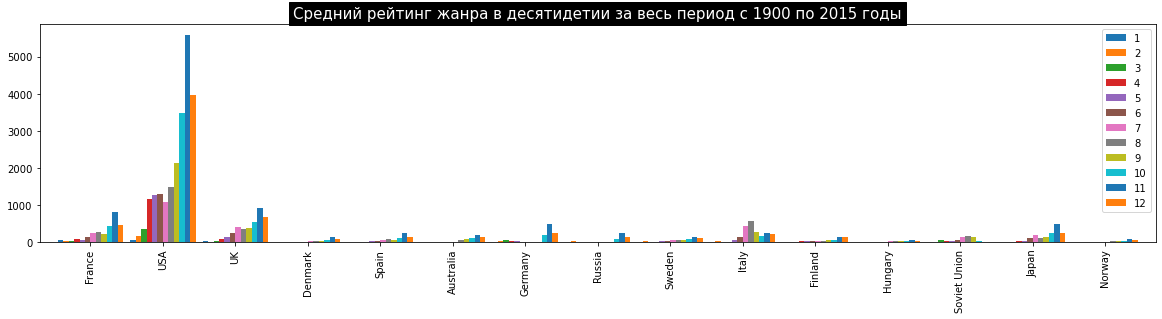

In [74]:
rcParams["figure.figsize"] = 20, 4
##locs = ['lower center']
#plt.hist(r2,  label='b')

rr = db[0:15].plot(kind = 'bar', width = 0.9)
plt.xticks(np.arange(len(db[0:15])), db['country'])
rr.set_title('Количество фильмов, произведенных топ 15 стран',
                  fontsize = 15,
                  color = 'white',
                  backgroundcolor = 'black');
##xlabel = rb['genre0']
##rb.set_xlim([0, 15])
##legend = rb[0:0]
##legend.remove
plt.show()

# Проверка гипотез

In [ ]:
Boxplot показывает, что средний рейтинг отличается в зависимости от страны-производителя фильма. 
Посмотрим, подтверждается ли гипотеза, что зависимость рейтинга от страны-призводителя является статистически значимой.

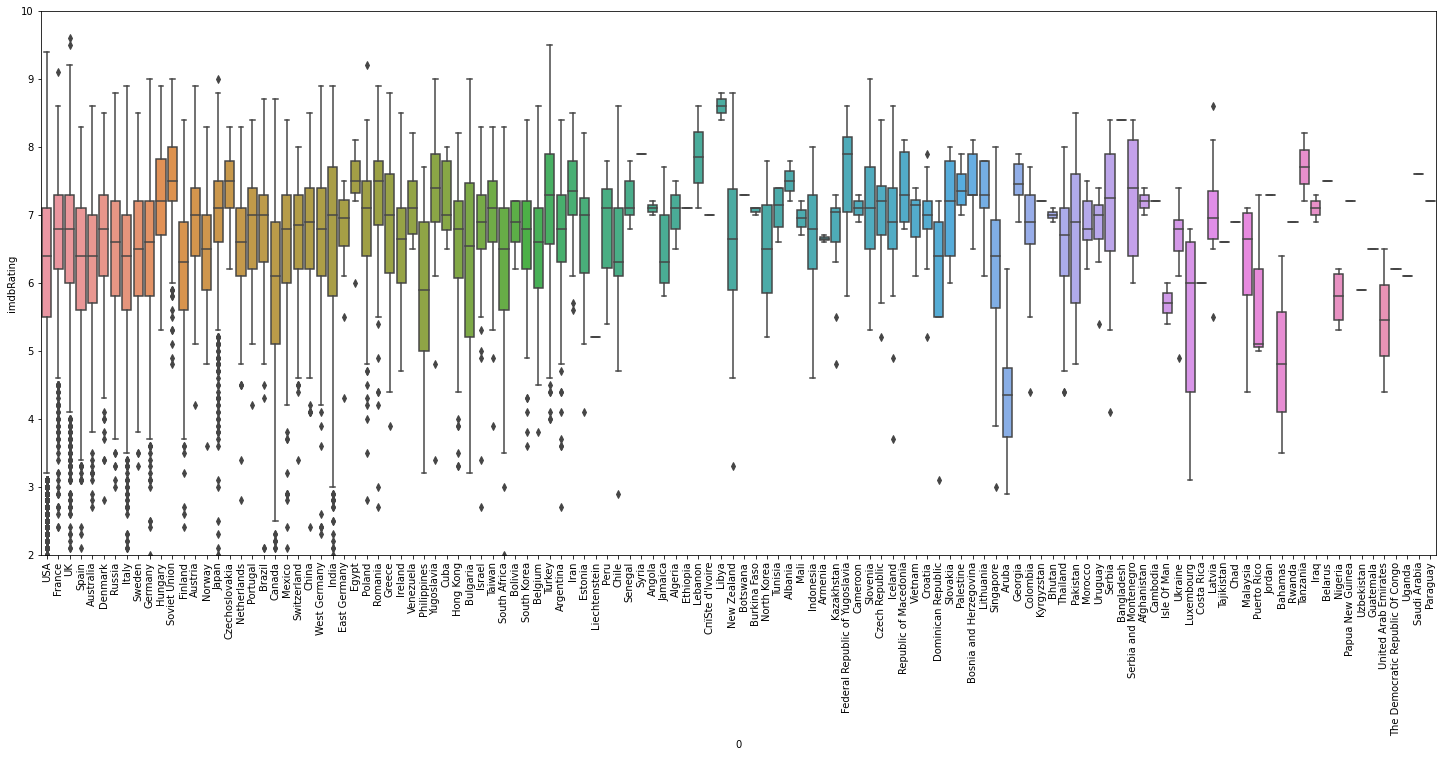

In [283]:
plt.figure(figsize= (25,10))
## plt.xticks(np.arange(len(fin_df[0:10])), fin_df[0])
plt.ylim(2,10)
plt.xticks(rotation=90)
##plt.xlim(fin_df[10:0])
sns.boxplot(fin_df[0].head(40000), fin_df['imdbRating']);

In [ ]:
Boxplot показывает, что средний рейтинг отличается в зависимости от жанра фильма. 
Посмотрим, подтверждается ли гипотеза, что зависимость рейтинга от жанра фильма является статистически значимой,
при уровне значимости 5%.

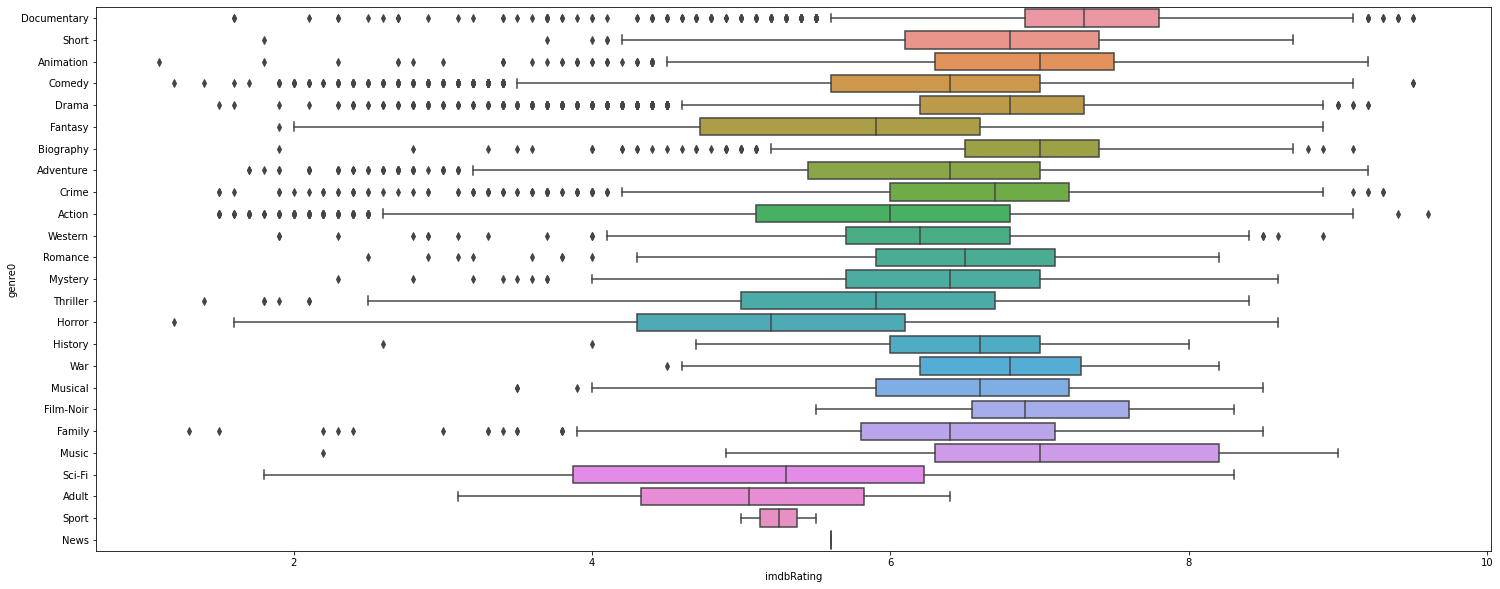

In [284]:
plt.figure(figsize= (25,10))
sns.boxplot(fin_df['imdbRating'], fin_df['genre0']);


Подтверждаем или опровергаем гипотезу о влиянии страны производителя на рейтинг фильма. Устанавливаем критерий значимости: альфа = 5% 

In [76]:
country_list= pd.DataFrame(fin_df['imdbRating'].groupby(fin_df[0]).mean())
country_list
k = len(country_list)
k

129

In [77]:
m = len((fin_df[0]))
m

43983

In [82]:
c = np.array(fin_df['imdbRating'].groupby(fin_df[0]))
c

array([['Afghanistan',
        25975    7.4
36409    7.0
41455    6.9
41615    6.4
45249    6.8
Name: imdbRating, dtype: float64],
       ['Albania',
        13632    7.8
34822    7.2
Name: imdbRating, dtype: float64],
       ['Algeria',
        9513     7.5
21277    6.5
28037    7.1
43415    7.1
Name: imdbRating, dtype: float64],
       ['Angola',
        8768     7.0
26796    7.2
Name: imdbRating, dtype: float64],
       ['Argentina',
        7349     7.7
7350     7.7
7352     7.7
7353     7.7
7593     8.0
        ... 
44544    5.8
44582    6.6
45322    7.1
45333    7.4
45337    5.6
Name: imdbRating, Length: 203, dtype: float64],
       ['Armenia',
        15401    6.6
15886    6.7
Name: imdbRating, dtype: float64],
       ['Aruba',
        18764    4.7
21191    4.6
24223    3.9
24858    3.2
25509    4.9
26136    6.2
27621    4.1
28457    2.9
Name: imdbRating, dtype: float64],
       ['Australia',
        42       6.3
4277     5.9
4451     6.4
5402     6.1
6930     6.6
        ... 
4

In [83]:
c = c.reshape(258)
c[1]

25975    7.4
36409    7.0
41455    6.9
41615    6.4
45249    6.8
Name: imdbRating, dtype: float64

In [84]:
f = {c[i]: c[i+1] for i in range(0, len(c), 2)}
f

{'Afghanistan': 25975    7.4
 36409    7.0
 41455    6.9
 41615    6.4
 45249    6.8
 Name: imdbRating, dtype: float64,
 'Albania': 13632    7.8
 34822    7.2
 Name: imdbRating, dtype: float64,
 'Algeria': 9513     7.5
 21277    6.5
 28037    7.1
 43415    7.1
 Name: imdbRating, dtype: float64,
 'Angola': 8768     7.0
 26796    7.2
 Name: imdbRating, dtype: float64,
 'Argentina': 7349     7.7
 7350     7.7
 7352     7.7
 7353     7.7
 7593     8.0
         ... 
 44544    5.8
 44582    6.6
 45322    7.1
 45333    7.4
 45337    5.6
 Name: imdbRating, Length: 203, dtype: float64,
 'Armenia': 15401    6.6
 15886    6.7
 Name: imdbRating, dtype: float64,
 'Aruba': 18764    4.7
 21191    4.6
 24223    3.9
 24858    3.2
 25509    4.9
 26136    6.2
 27621    4.1
 28457    2.9
 Name: imdbRating, dtype: float64,
 'Australia': 42       6.3
 4277     5.9
 4451     6.4
 5402     6.1
 6930     6.6
         ... 
 45005    7.6
 45054    4.8
 45104    8.0
 45123    7.8
 45635    7.1
 Name: imdbRating, 

In [85]:
dict_list_f = list(f.keys())
dict_list_f

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Bahamas',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Czechoslovakia',
 "CпїЅte d'Ivoire",
 'Denmark',
 'Dominican Republic',
 'East Germany',
 'Ecuador',
 'Egypt',
 'Estonia',
 'Ethiopia',
 'Federal Republic of Yugoslavia',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Guatemala',
 'Hong Kong',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Isle Of Man',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kyrgyzstan',
 'Laos',
 'Latvia',
 'Lebanon',
 'Libya',
 'Liechtenstein',
 'Lithuania',
 'Luxembourg',
 'Malaysia',
 'Mali',
 'Malta',
 'Mexico

In [91]:
k = pd.DataFrame(f.keys(), f.values())
##d.reset_index(inplace = False)
##d.columns = ['data','group']
##c = np.array(d.index)
k
np.array(k.index[0])
##c = np.array(f.index[0])
##c
len(k[0])

129

In [96]:
listB = []
for i in range(0, len(k[0]), 1):
    l = np.array(k.index[i])
    listB.append(l)    
print(listB)

[array([7.4, 7. , 6.9, 6.4, 6.8]), array([7.8, 7.2]), array([7.5, 6.5, 7.1, 7.1]), array([7. , 7.2]), array([7.7, 7.7, 7.7, 7.7, 8. , 7.4, 7.1, 7.1, 4.4, 3.7, 8.4, 7.7, 2.7,
       4.4, 7.9, 5.3, 5.5, 7.3, 5.6, 7.2, 7.2, 7.6, 7.9, 7.2, 7.1, 7. ,
       6.3, 5.1, 7.3, 7.1, 6.9, 5.5, 7.1, 7.2, 7.7, 7.2, 7.1, 6.7, 7.1,
       5.1, 3.6, 7.8, 7.1, 7.4, 7.1, 7.3, 7.1, 7. , 7.9, 7.3, 7. , 7.9,
       3.6, 6. , 7.7, 6.6, 7.4, 5.5, 5.5, 6.3, 6.9, 7.8, 7.2, 6.3, 7.3,
       7.2, 6.8, 6.5, 6.8, 6.2, 7.3, 7.2, 6.8, 7.3, 5.6, 6.6, 7.5, 7.2,
       7. , 6.2, 6.7, 7.4, 6.7, 6.6, 7.2, 7.1, 6.3, 7.3, 7.2, 7.3, 7.3,
       6.9, 6.7, 7.5, 6.1, 6.6, 7.7, 6.3, 6.9, 7.3, 6.6, 6.5, 6.3, 7. ,
       6.1, 6.1, 5.2, 6.7, 4.1, 7.2, 6.4, 7.7, 6.6, 7.1, 6. , 6.4, 5.9,
       6.5, 6.5, 6.5, 8.1, 6.1, 5.9, 6.6, 7.5, 8.1, 7. , 6.8, 7.9, 6.8,
       8.2, 6.3, 4.7, 5.9, 7.1, 7.1, 6.3, 7.3, 6.7, 7.3, 7.1, 6.9, 5. ,
       5.9, 5.9, 6.2, 6.3, 5.5, 5.5, 7.3, 5.5, 7.1, 6.9, 4.8, 6.3, 6.3,
       6.7, 6.4, 6.8, 6.3, 7. , 6.

In [98]:
listB[0]

array([7.4, 7. , 6.9, 6.4, 6.8])

In [99]:
stats.f_oneway(listB[0],
               listB[1],
               listB[2],
               listB[3],
               listB[4],
               listB[5],
               listB[6],
               listB[7],
               listB[8],
               listB[9],
               listB[10],
               listB[11],
               listB[12],
               listB[13],
               listB[14],
               listB[15],
               listB[16],
               listB[17],
               listB[18],
               listB[19],
               listB[20], 
               listB[21],
               listB[22],
               listB[23],
               listB[24],
               listB[25],
               listB[26],
               listB[27],
               listB[28],
               listB[29],
               listB[30],
               listB[31],
               listB[32],
               listB[33],
               listB[34],
               listB[35],
               listB[36],
               listB[37],
               listB[38],
               listB[39],
               listB[40],
               listB[41],
               listB[42],
               listB[43],
               listB[44],
               listB[45], 
               listB[46],
               listB[47],
               listB[48],
               listB[49],
listB[50],
               listB[51],
               listB[52],
               listB[53],
               listB[54],
               listB[55],
               listB[56],
               listB[57],
               listB[58],
               listB[59],
               listB[60],
               listB[61],
               listB[62],
               listB[63],
               listB[64],
               listB[65],
               listB[66],
               listB[67],
               listB[68],
               listB[69],
               listB[70], 
               listB[71],
               listB[72],
               listB[73],
               listB[74],
               listB[75],
               listB[76],
               listB[77],
               listB[78],
               listB[79],
               listB[80],
               listB[81],
               listB[82],
               listB[83],
               listB[84],
               listB[85],
               listB[86],
               listB[87],
               listB[88],
               listB[89],
               listB[90],
               listB[91],
               listB[92],
               listB[93],
               listB[94],
               listB[95], 
               listB[96],
               listB[97],
               listB[98],
               listB[99],
listB[100],
               listB[101],
               listB[102],
               listB[103],
               listB[104],
               listB[105],
               listB[106],
               listB[107],
               listB[108],
               listB[109],
               listB[110],
               listB[111],
               listB[112],
               listB[113],
               listB[114],
               listB[115],
               listB[116],
               listB[117],
               listB[118],
               listB[119],
               listB[120], 
               listB[121],
               listB[122],
               listB[123],
               listB[124],
               listB[125],
               listB[126],
               listB[127],
               listB[128])

F_onewayResult(statistic=22.85225687885331, pvalue=0.0)

Так как pvalue = 0 и меньше pvalue 5% установленного критерия значимости, значит гипотеза о том,
что страна-производитель влияет на рейтинг фильма является статистически значимой

In [ ]:
Подтверждаем или опровергаем гипотезу 
о влиянии жанра на рейтинг фильма. Устанавливаем критерий значимости: альфа = 5% 

In [285]:
genre_list= pd.DataFrame(fin_df['imdbRating'].groupby(fin_df['genre0']).mean())
genre_list
k = len(genre_list)
k

25

In [382]:
n = len((fin_df['genre0']))
n

43983

In [286]:
a = np.array(fin_df['imdbRating'].groupby(fin_df['genre0']))
a

array([['Action',
        100      7.6
101      6.2
129      6.8
130      7.1
241      6.6
        ... 
45677    2.7
45730    8.3
45769    7.4
45879    5.9
45998    9.4
Name: imdbRating, Length: 5069, dtype: float64],
       ['Adult',
        9100     4.4
9501     6.0
9683     6.4
9849     5.3
9915     4.8
19215    5.3
22339    3.1
23174    6.4
36073    3.6
37001    4.3
Name: imdbRating, dtype: float64],
       ['Adventure',
        54       5.7
64       6.9
80       6.1
83       6.6
104      6.3
        ... 
45172    8.4
45275    6.1
45292    8.3
45369    9.2
45375    5.1
Name: imdbRating, Length: 1783, dtype: float64],
       ['Animation',
        2        6.7
36       6.7
41       6.2
44       6.9
55       7.9
        ... 
45734    5.5
45825    7.4
45839    4.8
45922    7.5
45974    8.8
Name: imdbRating, Length: 1870, dtype: float64],
       ['Biography',
        42       6.3
125      6.8
168      6.5
294      6.6
321      7.1
        ... 
44845    7.2
45136    6.8
45333    7.4
4533

In [287]:
a = np.array(fin_df['imdbRating'].groupby(fin_df['genre0'])).reshape(50)
a[1]

100      7.6
101      6.2
129      6.8
130      7.1
241      6.6
        ... 
45677    2.7
45730    8.3
45769    7.4
45879    5.9
45998    9.4
Name: imdbRating, Length: 5069, dtype: float64

In [288]:
b = {a[i]: a[i+1] for i in range(0, len(a), 2)}
b

{'Action': 100      7.6
 101      6.2
 129      6.8
 130      7.1
 241      6.6
         ... 
 45677    2.7
 45730    8.3
 45769    7.4
 45879    5.9
 45998    9.4
 Name: imdbRating, Length: 5069, dtype: float64,
 'Adult': 9100     4.4
 9501     6.0
 9683     6.4
 9849     5.3
 9915     4.8
 19215    5.3
 22339    3.1
 23174    6.4
 36073    3.6
 37001    4.3
 Name: imdbRating, dtype: float64,
 'Adventure': 54       5.7
 64       6.9
 80       6.1
 83       6.6
 104      6.3
         ... 
 45172    8.4
 45275    6.1
 45292    8.3
 45369    9.2
 45375    5.1
 Name: imdbRating, Length: 1783, dtype: float64,
 'Animation': 2        6.7
 36       6.7
 41       6.2
 44       6.9
 55       7.9
         ... 
 45734    5.5
 45825    7.4
 45839    4.8
 45922    7.5
 45974    8.8
 Name: imdbRating, Length: 1870, dtype: float64,
 'Biography': 42       6.3
 125      6.8
 168      6.5
 294      6.6
 321      7.1
         ... 
 44845    7.2
 45136    6.8
 45333    7.4
 45337    5.6
 45488    6.3
 Nam

In [289]:
b.keys()

dict_keys(['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western'])

In [290]:
dict_list = list(b.keys())
dict_list

['Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Thriller',
 'War',
 'Western']

In [371]:
d = pd.DataFrame(b.keys(), b.values())
##d.reset_index(inplace = False)
##d.columns = ['data','group']
##c = np.array(d.index)
##c
np.array(d.index[0])
a = np.array(d.index[0])
a
len(d[0])

25

In [373]:
listA = []
for i in range(0, len(d[0]), 1):
    a = np.array(d.index[i])
    listA.append(a)    
print(listA)

[array([7.6, 6.2, 6.8, ..., 7.4, 5.9, 9.4]), array([4.4, 6. , 6.4, 5.3, 4.8, 5.3, 3.1, 6.4, 3.6, 4.3]), array([5.7, 6.9, 6.1, ..., 8.3, 9.2, 5.1]), array([6.7, 6.7, 6.2, ..., 4.8, 7.5, 8.8]), array([6.3, 6.8, 6.5, ..., 7.4, 5.6, 6.3]), array([7.1, 6.3, 5.7, ..., 6.4, 6.9, 8.1]), array([6.8, 6.6, 6.7, ..., 4.8, 6.8, 6. ]), array([5.9, 5.9, 6.9, ..., 7.1, 7.3, 8.6]), array([6.6, 6.5, 5.1, ..., 7.3, 7.4, 7. ]), array([6.6, 6.8, 6.3, 6.9, 5.4, 7.9, 6.9, 7.5, 6.7, 7.5, 7.3, 7.1, 7.3,
       7.2, 7.2, 7.1, 7.2, 7.3, 7.6, 7.7, 6.5, 6.6, 6. , 7.3, 7.2, 7.8,
       7.7, 6.2, 7.8, 8. , 7. , 7.3, 7.7, 7.1, 7.4, 7.2, 7.2, 3.4, 6.8,
       8.1, 8. , 7. , 8.1, 8.1, 8.5, 8.2, 7.7, 7.1, 8.2, 7.8, 6.9, 7.3,
       7.3, 7.2, 7.9, 6.5, 2.4, 6.5, 5.1, 7.4, 7.4, 6.9, 6.4, 7. , 4.4,
       7.1, 6.9, 6.6, 6.1, 5.4, 6. , 5.5, 6.2, 6.3, 7.1, 6.1, 6.3, 7. ,
       6. , 4. , 6.5, 7.4, 5.9, 5.3, 7.8, 7.1, 7.8, 6.2, 6.2, 7. , 5.8,
       6.2, 5.1, 6.8, 7.2, 7. , 6. , 6.4, 7. , 6.3, 6.3, 5.8, 8. , 5.9,
       6.4, 

In [375]:
listA[0]

array([7.6, 6.2, 6.8, ..., 7.4, 5.9, 9.4])

In [292]:
str(dict_list[0])

'Action'

In [380]:
stats.f_oneway(listA[0],
               listA[1],
               listA[2],
               listA[3],
               listA[4],
               listA[5],
               listA[6],
               listA[7],
               listA[8],
               listA[9],
               listA[10],
               listA[11],
               listA[12],
               listA[13],
               listA[14],
               listA[15],
               listA[16],
               listA[17],
               listA[18],
               listA[19],
               listA[20], 
               listA[21],
               listA[22],
               listA[23],
               listA[24])


F_onewayResult(statistic=399.7852564348576, pvalue=0.0)

In [ ]:
Так как pvalue = 0 и меньше pvalue 5% установленного критерия значимости, значит гипотеза о том,
что жанр влияет на рейтинг фильма является статистически значимой.